<a href="https://colab.research.google.com/github/AMR0017/testing/blob/ML/RockPaperScissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Azhar Mohammad Rachmdani

In [ ]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amr0017","key":"c0768ebc38ccbb71c54bc5dec0d38c82"}'}

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 63 Jul 27 04:46 kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                       title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ruchi798/data-science-job-salaries                        Data Science Job Salaries                           7KB  2022-06-15 08:59:12           9665        313  1.0              
surajjha101/bigbasket-entire-product-list-28k-datapoints  BigBasket Entire Product List (~28K datapoints)     6MB  2022-06-22 12:51:18           3294        125  1.0              
zusmani/petrolgas-prices-worldwide                        Petrol/Gas Prices Worldwide                        10KB  2022-06-24 01:25:33           2748        123  1.0              
ramjasmaurya/1-gb-internet-price                          Internet Prices around 200+ countries in 2

In [ ]:
!kaggle datasets download -d drgfreeman/rockpaperscissors

 92% 281M/306M [00:01<00:00, 191MB/s]
100% 306M/306M [00:02<00:00, 159MB/s]


In [ ]:
import zipfile,os

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/rps-cv-images'

paper_dir = os.path.join(base_dir,'paper')
rock_dir = os.path.join(base_dir,'rock')
scissors_dir = os.path.join(base_dir,'scissors')

In [ ]:
print('paper : ',len(os.listdir(paper_dir)))
print('rock : ',len(os.listdir(rock_dir)))
print('scissors : ',len(os.listdir(scissors_dir)))

paper :  712
rock :  726
scissors :  750


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(
    validation_split=0.4,
     rescale=1/255, 
     shear_range=0.2, 
     zoom_range=0.2, 
     rotation_range=20, 
     fill_mode='nearest')
train_data = generator.flow_from_directory(
    base_dir, 
    batch_size=32, 
    target_size=(150,150),
     subset='training')
val_data = generator.flow_from_directory(
    base_dir,
    batch_size=32,  
    target_size=(150,150), 
    subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)       

In [ ]:
model.compile(loss='categorial_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
from re import VERBOSE
model.fit(
    train_data,
    steps_per_epoch=25,
    epochs=20,
    validation_data = val_data,
    validation_steps=5,
    verbose=2
)

Epoch 1/20
25/25 - 50s - loss: 0.7244 - accuracy: 0.3862 - val_loss: 0.6213 - val_accuracy: 0.3812 - 50s/epoch - 2s/step
Epoch 2/20
25/25 - 45s - loss: 0.5214 - accuracy: 0.6299 - val_loss: 0.3788 - val_accuracy: 0.7750 - 45s/epoch - 2s/step
Epoch 3/20
25/25 - 43s - loss: 0.3120 - accuracy: 0.8065 - val_loss: 0.1957 - val_accuracy: 0.9062 - 43s/epoch - 2s/step
Epoch 4/20
25/25 - 43s - loss: 0.1944 - accuracy: 0.8831 - val_loss: 0.1254 - val_accuracy: 0.9375 - 43s/epoch - 2s/step
Epoch 5/20
25/25 - 46s - loss: 0.1655 - accuracy: 0.9062 - val_loss: 0.1104 - val_accuracy: 0.9500 - 46s/epoch - 2s/step
Epoch 6/20
25/25 - 45s - loss: 0.1537 - accuracy: 0.9175 - val_loss: 0.0952 - val_accuracy: 0.9750 - 45s/epoch - 2s/step
Epoch 7/20
25/25 - 43s - loss: 0.1404 - accuracy: 0.9208 - val_loss: 0.1335 - val_accuracy: 0.9375 - 43s/epoch - 2s/step
Epoch 8/20
25/25 - 45s - loss: 0.1253 - accuracy: 0.9312 - val_loss: 0.1141 - val_accuracy: 0.9500 - 45s/epoch - 2s/step
Epoch 9/20
25/25 - 45s - loss: 0

Saving baru.png to baru.png
baru.png
Rock


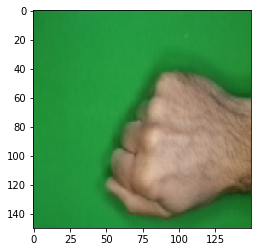

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=10)  
  print(fn)
  if classes[0][0]==1:
    print('Paper')

  elif classes[0][1] == 1:
    print('Rock')

  else:
    print('Scissors')